# Gopi Chand Yenikapalli Data Mining Final Bonus Assignment 

# Install and/or import necessary packages

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score ,f1_score,classification_report, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_text
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

C:\Users\Gopi Chand\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#importing CSV file with read_csv command and printing the top 5 values
df=pd.read_csv("C:/Users/Gopi Chand/Downloads/special_assignment.csv")
df.head(5)

,X1,X2,Y
0,16.24,7350.656224,1
1,-6.12,1013.093472,1
2,-5.28,-2299.159552,0
3,-10.73,-3920.953117,0
4,8.65,-9404.042875,0


# Explore and Clean the dataset

In [3]:
# Exploring number of rows and columns
rows = df.shape[0]
cols = df.shape[1]
print(f"Rows={rows} and Cols={cols}")

Rows=2000 and Cols=3


In [4]:
#The number of missing values in the entire dataframe
df.isnull().sum()

X1    5
X2    6
Y     0
dtype: int64

In [5]:
#dropping all the null value rows
df = df.dropna()

In [6]:
# Exploring number of rows and columns after dropping null rows
rows = df.shape[0]
cols = df.shape[1]
print(f"Rows={rows} and Cols={cols}")


Rows=1989 and Cols=3


therefore, total 11 rows dropped

In [7]:
df.dtypes

X1    float64
X2    float64
Y       int64
dtype: object

In [8]:
#The number of missing values in the entire dataframe after dropping null rows
df.isnull().sum()

X1    0
X2    0
Y     0
dtype: int64

In [9]:
#The standard deviation of X1 is 
df[['X1']].std().round(3)

X1    10.048
dtype: float64

In [10]:
#The standard deviation of X2 is 
df[['X2']].std().round(3)

X2    6225.684
dtype: float64

In [11]:
#The Mean of X1 is 
df[['X1']].mean().round(3)

X1    0.325
dtype: float64

In [12]:
#The Mean of X2 is 
df[['X2']].mean().round(3)

X2    338.699
dtype: float64

Therefore, there is little or no difference in mean if you drop null rows or replace with zero. i go with drop null rows

In [13]:
df['Y'].value_counts()

0    1006
1     983
Name: Y, dtype: int64

if you follow the 10% rule then Y values count is less than 10% so consider this as balanced data

# Predictors and Target variables Split

In [14]:
target = 'Y'
predictors = list(df.columns) #Assigning Predictors and coverting pandas series object to list.
predictors.remove('Y') #removing Target from predictors.
predictors #Checking Predictors list.

['X1', 'X2']

In [15]:
X=df[predictors]
y=df[target]

In [16]:
print(X)

         X1           X2
0     16.24  7350.656224
1     -6.12  1013.093472
2     -5.28 -2299.159552
3    -10.73 -3920.953117
4      8.65 -9404.042875
...     ...          ...
1995   1.89  -383.306631
1996   5.61 -4567.089419
1997  -9.22 -4747.559048
1998   6.47  3646.880923
1999  13.87  5951.584503

[1989 rows x 2 columns]


In [17]:
print(y)

0       1
1       1
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    1
1999    1
Name: Y, Length: 1989, dtype: int64


# Partitioning data into training and test data sets

training/test split of the data at 80% training and 20% testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [19]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(X_train[predictors])

# Transform the predictors of training, testing
Scaled_traindata= scaler.transform(X_train[predictors])
Scaled_testdata = scaler.transform(X_test[predictors])

In [20]:
count=0
for i in predictors:
    X_train[i]=Scaled_traindata[:,count]
    X_test[i]=Scaled_testdata[:,count]
    count=count+1
X_train

,X1,X2
1654,-0.462561,0.639396
204,-1.341300,-1.014220
1623,-1.078574,0.074307
31,-0.410812,-0.162603
1896,-0.816843,-0.670475
...,...,...
1800,-1.317416,-0.104489
1100,-0.148085,-1.085501
1941,-1.396035,0.649561
238,-1.681650,-1.523042


In [21]:
y_train.value_counts()

0    798
1    793
Name: Y, dtype: int64

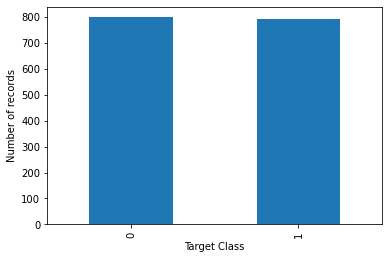

In [22]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [23]:
#checking for data imbalance as per 10% rule
(798-793)/(798+793)*100

0.3142677561282213

it is less than 10% we can say that data is balanced

# KNN using default parameters

Since we know the k-NN models are very sensitive to differences in scale, we have rescaled our variables before fitting the model.

In [24]:
%%time
knn = KNeighborsClassifier(n_neighbors=int(len(X_train)**0.5),  metric='euclidean') # user euclidean distance
knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


KNeighborsClassifier(metric='euclidean', n_neighbors=39)

In [25]:
%%time
%%capture --no-display
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'F2 Score: ':18}{fbeta_score(y_test, y_pred, beta=2):.3f}")
print("***********************")

CPU times: total: 15.6 ms
Wall time: 15.4 ms


# KNN with best k value using RandomSearch

In [26]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2,greater_is_better=False)

In [27]:
print(int(len(y_test)**0.5)*2 )

38


In [28]:
%%time
k_fold = 5
# Start with an initial guess for parameters
param_random = { 'n_neighbors' : list(range(1,38,2)),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
randomsearch = RandomizedSearchCV(KNeighborsClassifier(), param_random, cv=k_fold, scoring=ftwo_scorer,
                          n_jobs=-1, random_state =123)  # n_jobs=-1 will utilize all available CPUs 
randomsearch.fit(X_train, y_train)
print(ftwo_scorer, 'score: ', randomsearch.best_score_)
print('parameters: ', randomsearch.best_params_)

bestF2Knn = randomsearch.best_estimator_

make_scorer(fbeta_score, greater_is_better=False, beta=2) score:  -0.9840877002657346
parameters:  {'weights': 'uniform', 'n_neighbors': 29, 'metric': 'manhattan'}
CPU times: total: 141 ms
Wall time: 3.96 s


In [29]:
%%time
%%capture --no-display
y_pred = randomsearch.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'F2 Score: ':18}{fbeta_score(y_test, y_pred, beta=2):.3f}")
print("***********************")

CPU times: total: 15.6 ms
Wall time: 7.19 ms


# XGBoost with default parameter

In [30]:
%%time
xgboost = XGBClassifier(random_state=1)
_ = xgboost.fit(X_train, y_train)


[17:06:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: total: 172 ms
Wall time: 55.6 ms


C:\Users\Gopi Chand\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gopi Chand\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [31]:
%%time
%%capture --no-display
y_pred = xgboost.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print(f"{'F2 Score: ':18}{fbeta_score(y_test, y_pred, beta=2):.3f}")
print("***********************")

CPU times: total: 15.6 ms
Wall time: 3.89 ms


# XGBoost with hyperparameter tuning

In [32]:
# Criterion used to guide data splits
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(1, 4000, 50)]
max_depth.append(None)

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [int(x) for x in np.linspace(2, 500, 50)]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [int(x) for x in np.linspace(1, 1000, 50)]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 50)]
max_leaf_nodes.append(None)
# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }


In [33]:
%%time
xgboost = XGBClassifier(random_state=1)
best_random_search_model = RandomizedSearchCV(
        estimator=XGBClassifier(random_state=1), 
        scoring=ftwo_scorer, 
        param_distributions=param_grid_random, 
        n_iter = 200, 
        cv=5, 
        verbose=1, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\Gopi Chand\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gopi Chand\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:06:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "criterion", "max_leaf_nodes", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:06:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: total: 4.44 s
Wall time: 39 s


In [34]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 93, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0037, 'max_leaf_nodes': 389, 'max_depth': 2041, 'criterion': 'gini'}


In [35]:
print('Best score is {}'.format(best_random_search_model.best_score_))

Best score is -0.9909114293596147


In [36]:
%%time
%%capture --no-display
y_pred = best_random_search_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'F2 Score: ':18}{fbeta_score(y_test, y_pred, beta=2):.3f}")
print("***********************")

CPU times: total: 62.5 ms
Wall time: 40.3 ms


# Neural Network with deafult parameters

In [37]:
%%time
ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=1000,random_state =1)
_ = ann.fit(X_train, y_train)


CPU times: total: 1.02 s
Wall time: 3.03 s


In [38]:
%%time
%%capture --no-display
y_pred = ann.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'F2 Score: ':18}{fbeta_score(y_test, y_pred, beta=2):.3f}")
print("***********************")

CPU times: total: 0 ns
Wall time: 23.8 ms


# Neural Network with hyperparameter tuning

In [39]:
%%time
mlp_rs = MLPClassifier(max_iter=5000, random_state =1) #I fixed max_iter
parameter_space = {
    'hidden_layer_sizes': [(60,50,40),(10,)],
    'activation': ['tanh', 'relu','identity','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import RandomizedSearchCV
randomsearchAnn =  RandomizedSearchCV(mlp_rs, parameter_space,scoring=ftwo_scorer, n_jobs=-1, cv=5, random_state =123)
randomsearchAnn.fit(X_train, y_train)
print(ftwo_scorer, 'score: ', randomsearchAnn.best_score_)
print('parameters: ', randomsearchAnn.best_params_)
bestF2Ann = randomsearchAnn.best_estimator_

make_scorer(fbeta_score, greater_is_better=False, beta=2) score:  -0.9893877383520773
parameters:  {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (60, 50, 40), 'alpha': 0.0001, 'activation': 'logistic'}
CPU times: total: 953 ms
Wall time: 22.6 s


In [40]:
%%time
%%capture --no-display
y_pred = randomsearchAnn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'F2 Score: ':18}{fbeta_score(y_test, y_pred, beta=2):.3f}")
print("***********************")

CPU times: total: 0 ns
Wall time: 7.86 ms


Analysis/ Conclusion:-

F2 Score of three models as follows
1. KNN --> defalut F2 score = 0.975    and hyperparametered F2 score = 0.983
2. XGBoost --> defalut F2 score =  0.989   and hyperparametered F2 score = 0.989
3. Neural network --> defalut F2 score = 0.976   and hyperparametered F2 score = 0.989


	fit	pred
KNN	0	15.4 ms
KNN Tuned	3.96 s	7.19 ms
XGB	55.6 ms	3.89 ms
XGB Tuned	39 s	40.3 ms
ANN	3.03 s	23.8 ms
ANN Tuned	22.6 s	7.86 ms
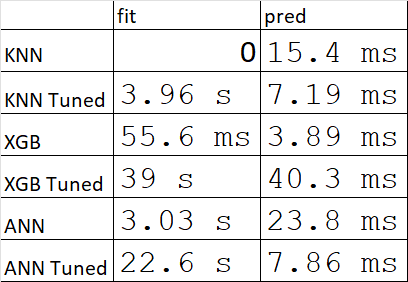

By comparing all models of F2 scores, I got XGBoost and hyperparameter tuned neural network same 98.9%, by considering the computation cost we can say hyperparameter tuned neural network is best model of having F2 score 98.9%